In [3]:
TH.data<- read.csv("D:RE71.csv",header=TRUE,
                    stringsAsFactors =FALSE,
                    strip.white =TRUE,
                    sep = ',', na.strings=c("","NA"))

In [4]:
str(TH.data)

'data.frame':	8598 obs. of  21 variables:
 $ X.1         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ X           : int  1 2 3 5 7 8 9 10 11 12 ...
 $ Suburb      : chr  "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address     : chr  "68 Studley St" "85 Turner St" "25 Bloomburg St" "5 Charles St" ...
 $ Rooms       : int  2 2 2 3 4 4 2 2 2 3 ...
 $ Type        : chr  "h" "h" "h" "h" ...
 $ Price       : num  1076961 1480000 1035000 1465000 1600000 ...
 $ Method      : chr  "SS" "S" "S" "SP" ...
 $ SellerG     : chr  "Jellis" "Biggin" "Biggin" "Biggin" ...
 $ Date        : chr  "3/09/2016" "3/12/2016" "4/02/2016" "4/03/2017" ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : int  2 2 2 3 3 3 4 3 2 4 ...
 $ Bathroom    : int  1 1 1 2 1 2 1 2 1 2 ...
 $ Car         : int  1 1 0 0 2 2 2 1 0 0 ...
 $ Landsize    : num  126 202 156 134 120 400 201 202 181 245 ...
 $ BuildingAre

In [6]:
TH.data2 <- TH.data[c(-1,-2,-3,-4,-8,-9,-11,-18,-19,-20)] #removed unnecessary columns
str(TH.data2)

'data.frame':	8598 obs. of  11 variables:
 $ Rooms       : int  2 2 2 3 4 4 2 2 2 3 ...
 $ Type        : chr  "h" "h" "h" "h" ...
 $ Price       : num  1076961 1480000 1035000 1465000 1600000 ...
 $ Date        : chr  "3/09/2016" "3/12/2016" "4/02/2016" "4/03/2017" ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : int  2 2 2 3 3 3 4 3 2 4 ...
 $ Bathroom    : int  1 1 1 2 1 2 1 2 1 2 ...
 $ Car         : int  1 1 0 0 2 2 2 1 0 0 ...
 $ Landsize    : num  126 202 156 134 120 400 201 202 181 245 ...
 $ BuildingArea: num  147 147 79 150 142 ...
 $ Longtitude  : num  145 145 145 145 145 ...


In [7]:
TH.data1<-factor(c(TH.data2$Type))

In [8]:
str(TH.data1)

 Factor w/ 2 levels "h","t": 1 1 1 1 1 1 1 1 1 1 ...


In [9]:
library("openxlsx")
library(dplyr)


Warning message:
"package 'openxlsx' was built under R version 3.5.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [13]:
TH <- mutate(TH.data, TypeValue = ifelse(TH.data$Type == "h",0,1))

In [14]:
str(TH)

'data.frame':	8598 obs. of  22 variables:
 $ X.1         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ X           : int  1 2 3 5 7 8 9 10 11 12 ...
 $ Suburb      : chr  "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address     : chr  "68 Studley St" "85 Turner St" "25 Bloomburg St" "5 Charles St" ...
 $ Rooms       : int  2 2 2 3 4 4 2 2 2 3 ...
 $ Type        : chr  "h" "h" "h" "h" ...
 $ Price       : num  1076961 1480000 1035000 1465000 1600000 ...
 $ Method      : chr  "SS" "S" "S" "SP" ...
 $ SellerG     : chr  "Jellis" "Biggin" "Biggin" "Biggin" ...
 $ Date        : chr  "3/09/2016" "3/12/2016" "4/02/2016" "4/03/2017" ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : int  2 2 2 3 3 3 4 3 2 4 ...
 $ Bathroom    : int  1 1 1 2 1 2 1 2 1 2 ...
 $ Car         : int  1 1 0 0 2 2 2 1 0 0 ...
 $ Landsize    : num  126 202 156 134 120 400 201 202 181 245 ...
 $ BuildingAre

In [15]:
log.model1 <- glm(TypeValue ~ Price+Rooms, data=TH,family=binomial)

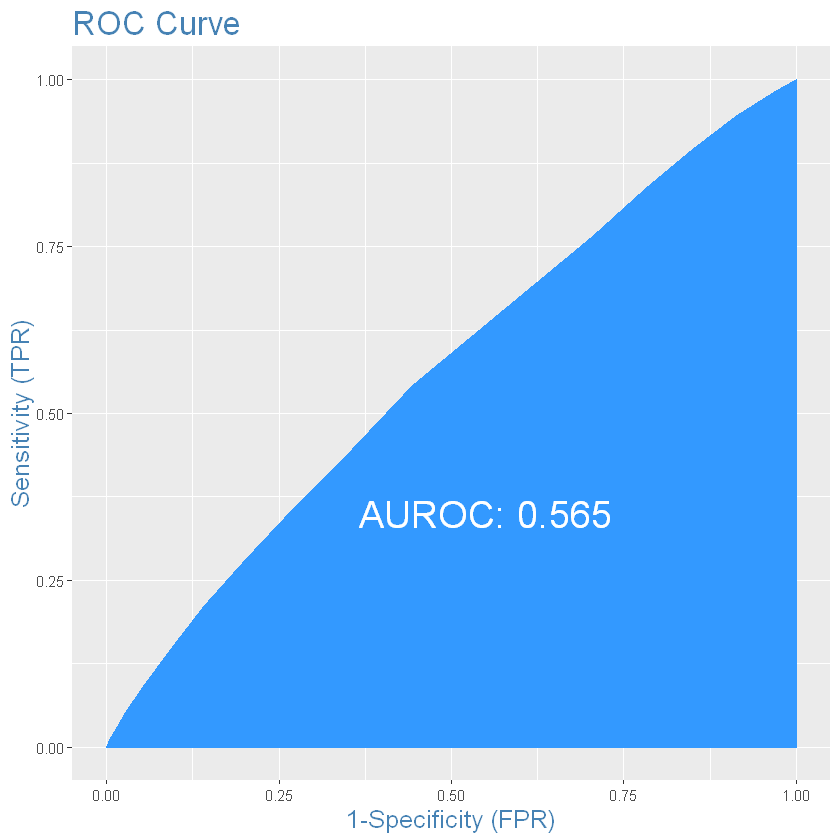

In [17]:
library(InformationValue)
predicted1<- predict(log.model1, TH, type="response")  # predicted scores
#predictedU
plotROC(TH, predicted1)

In [18]:
confusionMatrix(TH$TypeValue, predicted1 >= 0.5)

,0,1
0,7321,1277


In [19]:
sensitivity(TH$TypeValue, predicted1, threshold = 0.5)
specificity(TH$TypeValue, predicted1, threshold = 0.5)

[1] 0

[1] 1

In [21]:
pricedata <- data.frame(Price=seq(min(TH$Price), max(TH$Price),len=6736))
pricedata <- mutate(pricedata, Rooms=seq(min(TH$Rooms),max(TH$Rooms),len=6736))

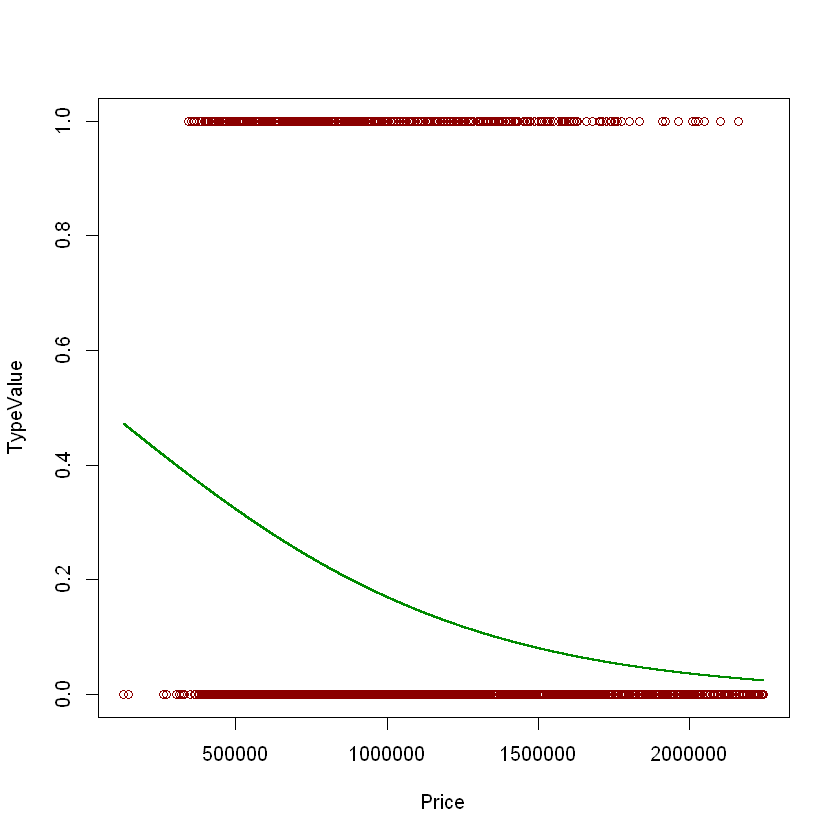

In [22]:
pricedata$TypeValue<- predict(log.model1,newdata=pricedata,type='response')

plot(TypeValue~Price,data=TH,col="red4",ylim=c(0,1))

lines(TypeValue ~ Price, pricedata, col="green4", lwd=2)